### Statistics/Plots

We have analyzed the frequencies and distributions of the existence and existence_confidence columns. The distribution of the scores for existence_confidence are most frequent around 0.6 to 0.75 and highest at 1.0. We have an imbalance where there are more tweets believing in climate change compared to those that don’t. This is further confirmed by the existence distribution histogram. The top twenty words do not change much before and after preprocessing. One interesting pattern is that the words “climate”, “change”, and “global” stay as the top twenty either way.
One interesting finding from the word clouds is that the words pertaining to links (bit.ly, tinyurl) are showing up as the most impactful. After preprocessing, words/phrases such as greenhouse, conscious, and oil spill show up as the most impactful. This confirms that preprocessing helped in bringing out the most relevant words in the analysis.

In [ ]:
import numpy as np
import pandas as pd
import spacy
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt 
from itertools import chain
from wordcloud import WordCloud, STOPWORDS 

!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/gdrive/My Drive/CMPE257-ML-Group-13/global_warming_tweets.xls')
data.head()

,tweet,existence,existence.confidence
0,Global warming report urges governments to act...,Yes,1.0000
1,Fighting poverty and global warming in Africa ...,Yes,1.0000
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087


In [ ]:
data['word_count'] = data['tweet'].apply(lambda x: len(x.split(" ")))
data.loc[data['existence'] == 'Y','existence'] = "Yes"
data.loc[data['existence'] == 'N','existence'] = "No"
data.dropna()
print(data['existence'].value_counts())
data.head()

Yes    3111
No     1114
Name: existence, dtype: int64


,tweet,existence,existence.confidence,word_count
0,Global warming report urges governments to act...,Yes,1.0000,18
1,Fighting poverty and global warming in Africa ...,Yes,1.0000,8
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786,12
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000,12
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087,11


In [ ]:
tweets = data["tweet"]
tweets = tweets.drop_duplicates()
tweets

0       Global warming report urges governments to act...
1       Fighting poverty and global warming in Africa ...
2       Carbon offsets: How a Vatican forest failed to...
4       URUGUAY: Tools Needed for Those Most Vulnerabl...
5       RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness...
                              ...                        
6085    @bloodless_coup "The phrase 'global warming' s...
6086    Virginia to Investigate Global Warming Scienti...
6087    Global warming you tube parody you will enjoy ...
6088    One-Eyed Golfer: Don't dare tell me about glob...
6089    man made global warming a hair brained theory ...
Name: tweet, Length: 5541, dtype: object

For Preprocessing we have used

In [ ]:
### Source: https://spacy.io/usage/linguistic-features

def spacyPipeline(tweets):
    ps = PorterStemmer()
    nlp = spacy.load('en_core_web_sm')
    
    preprocessed_tweets = []
    for t in tweets:
        doc = nlp(t)
        filtered_tweet = []
        
        for token in doc:
            if (not token.is_stop) and token.is_alpha:
                filtered_tweet.append(ps.stem(str(token)))
        
        preprocessed_tweets.append(filtered_tweet)
    
    return preprocessed_tweets

In [ ]:
def preprocess(tweets):
    # Convert all to lowercase
    tweets = [t.lower() for t in tweets]
    
    # Process tweets through spaCy pipeline
    tweets = spacyPipeline(tweets)
    
    # Filter out words
    tweets = [list(filter(lambda w: w != 'link', t)) for t in tweets]
    
    # Remove words less than length 2
    tweets = [list(filter(lambda w: len(w) > 2, t)) for t in tweets]
    
    print(tweets)
    return tweets

In [ ]:
def generateWordCloud(tweets):
    allwords = " ".join(set(chain.from_iterable(tweets)))
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = set(STOPWORDS), 
                    min_font_size = 10).generate(allwords)

    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.figure(figsize = (7, 7), facecolor = 'white', edgecolor='blue') 
    plt.imshow(wordcloud) 

    plt.show()

In [ ]:
preprocessed_tweets = preprocess(tweets)

[['global', 'warm', 'report', 'urg', 'govern', 'belgium', 'world', 'face', 'increas', 'hunger'], ['fight', 'poverti', 'global', 'warm', 'africa'], ['carbon', 'offset', 'vatican', 'forest', 'fail', 'reduc', 'global', 'warm'], ['uruguay', 'tool', 'need', 'vulner', 'climat', 'chang'], ['ocean', 'salti', 'show', 'global', 'warm', 'intensifi', 'water', 'cycl'], ['global', 'warm', 'evid', 'messag', 'global', 'warm', 'denier', 'doubter', 'look'], ['migratori', 'bird', 'new', 'climat', 'chang', 'strategi', 'stay', 'home'], ['southern', 'africa', 'compet', 'limpopo', 'water', 'climat', 'chang', 'bring', 'higher', 'temperatur', 'south'], ['global', 'warm', 'impact', 'wheat', 'rice', 'product', 'apr', 'scarciti', 'water'], ['solv', 'global', 'warm', 'thing'], ['preliminari', 'analysi', 'suggest', 'natur', 'contribut', 'far', 'global', 'warm', 'previous'], ['ecoton', 'climat', 'chang', 'popul', 'perspect'], ['climat', 'chang', 'blame', 'coastal', 'whale', 'migrat', 'dwindl', 'ventura', 'counti'], 

## VISUALIZATIONS
https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

https://github.com/yrtnsari/Sentiment-Analysis-NLP-with-Python/blob/main/wordcloud.ipynb


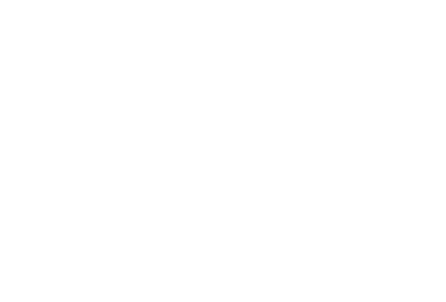

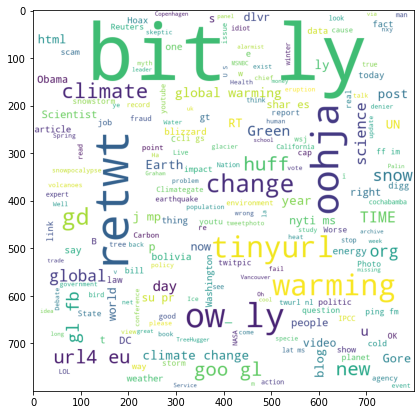

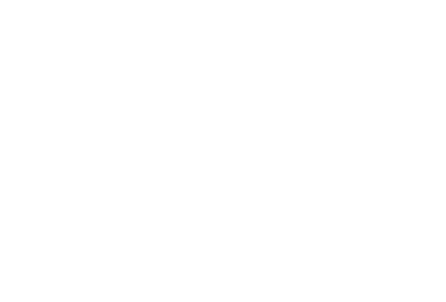

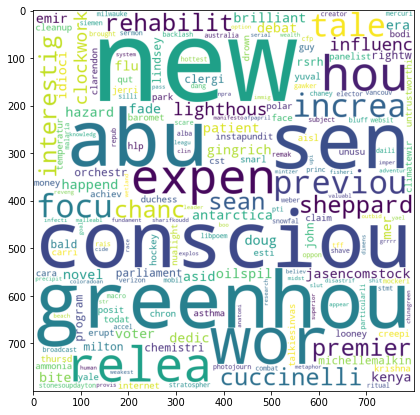

In [ ]:
generateWordCloud([t.split(' ') for t in tweets])
generateWordCloud(preprocessed_tweets)

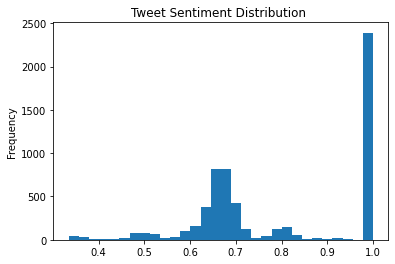

In [ ]:
data['existence.confidence'].plot(
    kind='hist',
    bins=30,
    title='Tweet Sentiment Distribution ')

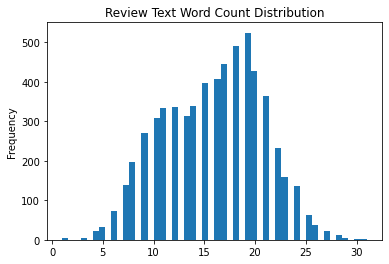

In [ ]:
data['word_count'].plot(
    kind='hist',
    # xTitle = "Word Count",
    bins=50,
    title='Tweet Word Count Distribution')

           existence.confidence  word_count
existence                                  
No                     849.8694       19016
Yes                   2555.6852       48464


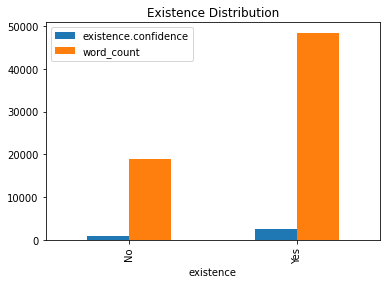

In [ ]:
print(data.groupby(by=["existence"]).sum())
data.groupby(by=["existence"]).sum().plot(kind = 'bar',title = "Existence Distribution")

climate 3756
change 3438
global 3247
warming 3134
link 980
retwt 358
news 266
snow 248
bill 247
tcot 242
oohja 217
will 212
science 210
energy 204
green 192
report 179
world 178
earth 173
obama 155
people 149


,tweet,word_count
0,climate,3756
1,change,3438
2,global,3247
3,warming,3134
4,link,980


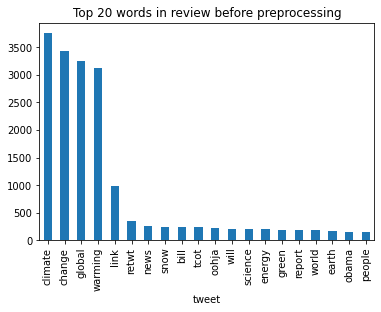

In [ ]:
# The distribution of top unigrams before removing stop words
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items() if len(word) > 3 and word not in set(STOPWORDS)]
    # words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(data['tweet'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['tweet' , 'word_count'])
display(df1.head())

df1.groupby('tweet').sum()['word_count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review before preprocessing')



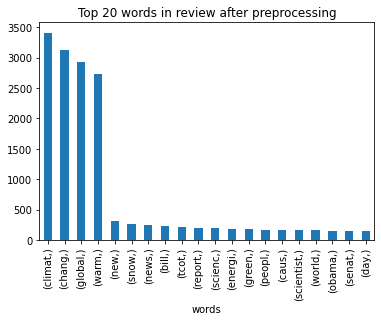

In [ ]:
allwords = list(chain.from_iterable(preprocessed_tweets))
df2 = pd.DataFrame(allwords,columns = ["words"])
df2.value_counts()[:20].plot(kind='bar', title='Top 20 words in review after preprocessing')
# allwords
# preprocessed_tweets